# 1. Import and Install Dependencies

In [1]:
%pip install tensorflow opencv-python mediapipe scikit-learn matplotlib wandb

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

print(tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using the following GPUs:")
    for gpu in gpus:
        print(gpu)
else:
    print("TensorFlow is not using any GPUs.")



2.16.1
TensorFlow is not using any GPUs.


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\zimmer\anaconda3\envs\win_deepsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [9]:
draw_landmarks(frame, results)
print(results.face_landmarks)

landmark {
  x: 0.311927587
  y: 0.548012853
  z: -0.0118807908
}
landmark {
  x: 0.294246495
  y: 0.511672378
  z: -0.0345431305
}
landmark {
  x: 0.312115848
  y: 0.520701826
  z: -0.0145496139
}
landmark {
  x: 0.293191165
  y: 0.466637701
  z: -0.0250551291
}
landmark {
  x: 0.291195154
  y: 0.499283373
  z: -0.0384285
}
landmark {
  x: 0.293506354
  y: 0.481571913
  z: -0.0378145128
}
landmark {
  x: 0.304947257
  y: 0.432915509
  z: -0.0264901258
}
landmark {
  x: 0.276969492
  y: 0.415174901
  z: 0.0461239293
}
landmark {
  x: 0.305078685
  y: 0.393001646
  z: -0.0266963784
}
landmark {
  x: 0.301601171
  y: 0.374766469
  z: -0.0309266895
}
landmark {
  x: 0.300578743
  y: 0.306431711
  z: -0.0347261652
}
landmark {
  x: 0.313274294
  y: 0.554137826
  z: -0.0101814317
}
landmark {
  x: 0.315972239
  y: 0.55893296
  z: -0.00702493452
}
landmark {
  x: 0.31925565
  y: 0.561195195
  z: -0.00330277067
}
landmark {
  x: 0.319078
  y: 0.563137
  z: -0.000482842559
}
landmark {
  x: 0.

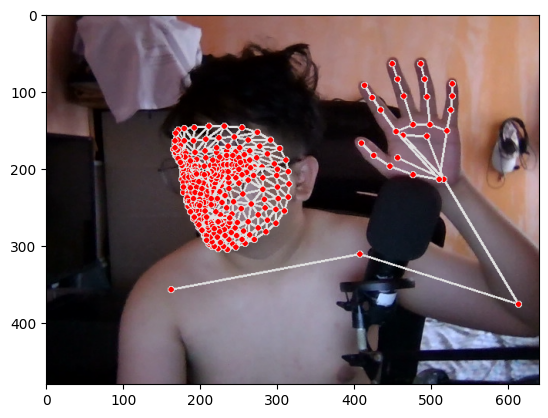

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)
print(results.pose_landmarks)

landmark {
  x: 0.334982306
  y: 0.499067366
  z: -0.675667346
  visibility: 0.999986887
}
landmark {
  x: 0.369834423
  y: 0.42541948
  z: -0.667822361
  visibility: 0.99996531
}
landmark {
  x: 0.391635358
  y: 0.419900566
  z: -0.667309105
  visibility: 0.999968469
}
landmark {
  x: 0.414143473
  y: 0.415208071
  z: -0.66710037
  visibility: 0.999965072
}
landmark {
  x: 0.326883137
  y: 0.431939155
  z: -0.618988574
  visibility: 0.999962389
}
landmark {
  x: 0.315869659
  y: 0.431511492
  z: -0.618057728
  visibility: 0.999952793
}
landmark {
  x: 0.305548757
  y: 0.431304
  z: -0.618157744
  visibility: 0.99993974
}
landmark {
  x: 0.469345748
  y: 0.418886304
  z: -0.464230388
  visibility: 0.999971628
}
landmark {
  x: 0.321025223
  y: 0.434987813
  z: -0.215733677
  visibility: 0.999971151
}
landmark {
  x: 0.372524351
  y: 0.550737619
  z: -0.592608631
  visibility: 0.999983847
}
landmark {
  x: 0.325915217
  y: 0.548564
  z: -0.521532059
  visibility: 0.999981046
}
landmark 

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)
print(result_test)

[ 0.33498231  0.49906737 -0.67566735 ...  0.          0.
  0.        ]


In [17]:
print(result_test)

[ 0.33498231  0.49906737 -0.67566735 ...  0.          0.
  0.        ]


In [18]:
np.save('0', result_test)

In [19]:
np.load('../Data//hello//10//0.npy')

array([ 0.66775966,  0.59646714, -0.58320916, ...,  0.3797726 ,
        0.36501831, -0.02595169])

# 4. Setup Folders for Collection

In [10]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('../Data') 


# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [11]:
# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'idle',])
# actions = np.array([
#     'hello', 'thanks', 'iloveyou', 'idle',
#     'A', 'B', 'C', 'D', 'E',
#     'F', 'G', 'H', 'I', 'J',
#     'K', 'L', 'M', 'N', 'O',
#     'P', 'Q', 'R', 'S', 'T',
#     'U', 'V', 'W', 'X', 'Y',
#     'Z',
#     ])

print(len(actions))

4


In [12]:
for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    dirmax = np.max([0] + [int(d) for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))])
    for sequence in range(1, no_sequences+1):
        try: 
            os.makedirs(os.path.join(action_path, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [56]:
cap.release()
cv2.destroyAllWindows()

In [55]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

c:\Users\zimmer\anaconda3\envs\win_deepsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


KeyboardInterrupt: 

# 6. Preprocess Data and Create Labels and Features

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
label_map = {label:num for num, label in enumerate(actions)}

In [15]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'idle': 3}

In [16]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: '../Data\\hello\\121\\0.npy'

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [32]:
np.array(sequences).shape

(120, 30, 1662)

In [33]:
np.array(labels).shape

(120,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(25, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, stratify=y) 

#increase test size to round off test per gesture (28.5/1.5 = 27/3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y) 


In [17]:
# Initial Split (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y) 

# Split Training Data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)  


# X_train, y_train for training
# X_val, y_val for validation during training
# X_test, y_test for final model evaluation



NameError: name 'X' is not defined

In [33]:
y_test.shape

(3, 1)

# 7. Build and Train LSTM Neural Network

In [23]:
import os
import wandb
from keras.callbacks import TensorBoard, Callback
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback, TensorBoard
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import Callback
import logging
import numpy as np

In [94]:
log_dir = os.path.join('Logs')

class IterationCallback(Callback):
    def __init__(self, num_samples_per_gesture=120, smoothing_window=10):
        super(IterationCallback, self).__init__()
        self.num_samples_per_gesture = num_samples_per_gesture
        self.smoothing_window = smoothing_window
        # self.patience = patience 
        self.wait = 0 
        self.stopped_epoch = 0
        self.best = np.inf

    def on_train_begin(self, logs=None):
        self.wait = 0
        self.stopped_epoch = 0
        self.best = np.inf 

    def on_epoch_end(self, epoch, logs=None):
        # Log per-gesture accuracy at the end of each epoch
        y_pred = self.model.predict(X_train)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_train, axis=1)

        for gesture_idx in range(len(actions)):
            gesture_label = actions[gesture_idx]
            gesture_mask = (y_true_classes == gesture_idx) 
            if gesture_mask.any():
                gesture_acc = np.mean(y_pred_classes[gesture_mask] == y_true_classes[gesture_mask])
            else:
                logging.error(f"No samples for gesture {gesture_label} in this batch.")
                gesture_acc = np.nan 

            wandb.log({f"{gesture_label}_acc": gesture_acc})

        # Get overall accuracy and loss from logs
        loss = logs.get('loss')
        total_correct = np.sum(y_pred_classes == y_true_classes)
        total_samples = len(y_true_classes)
        overall_accuracy = total_correct / total_samples
        current_val_accuracy = logs.get('val_accuracy')
        val_loss = logs.get("val_loss") 

        # Early Stop 
        # if val_loss is None:
        #     logging.warning("Val loss is None")
        # elif val_loss < self.best: 
        #     self.best = val_loss
        #     self.wait = 0
        # else:
        #     self.wait += 1
        #     if self.wait >= self.patience:
        #         self.stopped_epoch = epoch
        #         self.model.stop_training = True

        # Log to WandB
        wandb.log({
            "epoch": epoch,
            "loss": loss,
            "train_accuracy": overall_accuracy,
            "val_loss": val_loss, 
            "val_accuracy": current_val_accuracy
        })

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))


# Combine Callbacks
callbacks = [
    TensorBoard(log_dir=log_dir, histogram_freq=1),
    IterationCallback() 
]

In [24]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\zimmer\anaconda3\envs\win_deepsign\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=False, activation='relu')) 

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization()) 

model.add(Dense(actions.shape[0], activation='softmax'))

NameError: name 'Sequential' is not defined

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, LSTM, Dense, Activation


model = Sequential()
model.add(Conv1D(32, kernel_size=3, input_shape=(30, ,1662)))
model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
# model.add(Activation('relu'))

# Dense Layers
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(actions.shape[0], activation='softmax')) 

SyntaxError: invalid syntax (2834465950.py, line 6)

In [109]:
os.environ["DEEP_SIGN"] = "model_training.ipynb"
wandb.init(project="deep-sign", notes="same with previous but tried with a higher epoch")  
wandb.config = { 
    "dataset": "dataset-v1.0",
    "model_type": "Conv1D-LSTM",
    "input_shape": (30, 1662),  
    "conv_layers": [
        {"filters": 32, "kernel_size": 3}
    ],
    "lstm_layers": [
        {"units": 64, "return_sequences": True},
        {"units": 128, "return_sequences": True},
        {"units": 64, "return_sequences": False}
    ],
    "dense_layers": [
        {"units": 64, "activation": "relu"},
        {"units": 32, "activation": "relu"}
    ],
    "output_units": actions.shape[0],
    "optimizer": "Adam",
    "loss": "categorical_crossentropy",
    "batch_normalization": True,
    "epochs": 1000
}

CommError: Run initialization has timed out after 90.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=wandb.config['epochs'], batch_size=5, callbacks=callbacks,
          validation_data=(X_val, y_val), validation_freq=1) 
wandb.save(os.path.join(log_dir, '*'))

Epoch 1/600
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step   - categorical_accuracy: 0.2
389/389 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - categorical_accuracy: 0.2007 - loss: 2.6867 - val_categorical_accuracy: 0.0947 - val_loss: 3.6933
Epoch 2/600
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/stepep - categorical_accuracy: 0.1994 - l
389/389 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - categorical_accuracy: 0.1994 - loss: 2.6007 - val_categorical_accuracy: 0.1235 - val_loss: 3.4972
Epoch 3/600
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step ep - categorical_accuracy: 0.2076
389/389 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - categorical_accuracy: 0.2078 - loss: 2.5576 - val_categorical_accuracy: 0.1955 - val_loss: 2.5941
Epoch 4/600
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step ep - categorical_accuracy: 0.219
389/389 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - categorical_accuracy: 0.2195 - loss: 2.5794 - val_categorical_accuracy: 0.1996 - val_loss: 2.6904
Epoch 5/600
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step ep - categorical_accuracy: 0.2245 
389/3

OSError: [WinError 1314] A required privilege is not held by the client: 'c:\\Users\\zimmer\\Desktop\\AVANTECH\\deep-sign\\Training\\Logs\\train' -> 'c:\\Users\\zimmer\\Desktop\\AVANTECH\\deep-sign\\Training\\wandb\\run-20240516_190117-5yatds0n\\files\\Logs\\train'

In [36]:
wandb.save(os.path.join(log_dir, '*'))

OSError: [WinError 1314] A required privilege is not held by the client: 'c:\\Users\\zimmer\\Desktop\\AVANTECH\\deep-sign\\Training\\Logs\\train' -> 'c:\\Users\\zimmer\\Desktop\\AVANTECH\\deep-sign\\Training\\wandb\\run-20240516_135933-yw8sgne4\\files\\Logs\\train'

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,708 (2.28 MB)

 Trainable params: 596,708 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
import wandb
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
metrics.confusion_matrix(y_true_classes, y_pred_classes, normalize='true')  
wandb.log({"confusion_matrix": wandb.Image(fig)})


NameError: name 'X_test' is not defined

# 8. Make Predictions

In [56]:
res = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [57]:
actions[np.argmax(res[2])]

'Y'

In [59]:
actions[np.argmax(y_test[2])]

'N'

# 9. Save Weights

In [71]:
model.save('../models/deepsign-v2.0.keras')

In [ ]:
del model

In [26]:
model.load_weights('../models/deepsign_chan-v3.0.keras')

c:\Users\zimmer\anaconda3\envs\win_deepsign\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 32 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# 10. Evaluation using Confusion Matrix and Accuracy

In [34]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [35]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


In [36]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [37]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 0],
        [1, 2]],

       [[2, 1],
        [0, 0]]], dtype=int64)

In [38]:
accuracy_score(ytrue, yhat)

0.6666666666666666

In [39]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16) (245,117,16), (245,117,16)]
# colors = [
#     (245,117,16), (117,245,16), (16,117,245), (245,117,16),
#     (245,117,16), (117,245,16), (16,117,245), (245,117,16),
#     (245,117,16), (117,245,16), (16,117,245), (245,117,16),
#     (245,117,16), (117,245,16), (16,117,245), (245,117,16),
#     (245,117,16), (117,245,16), (16,117,245), (245,117,16),
#     (245,117,16), (117,245,16), (16,117,245), (245,117,16),
#     (245,117,16), (117,245,16), (16,117,245), (245,117,16),
#     (245,117,16), (117,245,16), 
#     ]

In [42]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, 
              (0, 60 + num * 40), 
              (int(np.round(prob * 900)), 90 + num * 40), # Use np.round
              colors[num], -1) 
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [43]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1800x1800 with 0 Axes>

In [44]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # print(predictions)
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(image)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            print(predictions[-10:], np.unique(predictions[-10:]))
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                print(actions[np.argmax(res)], res[np.argmax(res)])
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                           
                    else:
                        sentence.append(actions[np.argmax(res)])
                        print(sentence)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\zimmer\anaconda3\envs\win_deepsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
[3] [3]
idle 0.999151
['idle']


IndexError: list index out of range

: 

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 32)         │       159,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 28, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 28, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,021,916 (3.90 MB)

 Trainable params: 340,446 (1.30 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 680,894 (2.60 MB)

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
# colors = [(245,117,16), (117,245,16)]
colors = [
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), 
    ]

In [ ]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, 
              (0, 60 + num * 40), 
              (int(np.round(prob * 900)), 90 + num * 40), # Use np.round
              colors[num], -1) 
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: 'NormalizedLandmark' object is not iterable

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # print(predictions)
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(image)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            print(predictions[-10:], np.unique(predictions[-10:]))
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                print(actions[np.argmax(res)], res[np.argmax(res)])
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                           
                    else:
                        sentence.append(actions[np.argmax(res)])
                        print(sentence)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
[13] [13]
J 0.996858
['J']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13] [13]
J 0.99686277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13] [13]
J 0.995031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[13, 13, 13, 13] [13]
J 0.99764305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13] [13]
J 0.99392635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13] [13]
J 0.99653256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13] [13]
J 0.9933508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99480575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99169344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9966376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9975157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9982486
1/1 ━━━━━━━━━━━━━